<a href="https://colab.research.google.com/github/mozey256/TGR5/blob/main/ML_Part_5_TGR5_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Novel Small Molecules as Potential TGR5/GLP1 Agonists in Type 2 Diabetes Treatment [Part 5] Comparing Regressors**

Moses Ainembabazi
['mozey256' github](https://github.com/mozey256/TGR5)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of tgr5 target compounds.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
df = pd.read_csv('06_bioactivity_data_3class_pEC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pEC50', axis=1)
Y = df.pEC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(719, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(719, 230)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train, test = clf.fit(X_train, X_test, Y_train, Y_test)
#models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
#models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:30<00:00,  1.39it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 575, number of used features: 230
[LightGBM] [Info] Start training from score 6.527704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,93235580118799065393758347093377794201597547444...,-5672374454780082576983170745563527675765213037...,3060530404639046561634373114991214592.00,0.18
LinearRegression,223494656452638768365568.00,-135972273506150843940864.00,473848414319.87,0.05
TransformedTargetRegressor,223494656452638768365568.00,-135972273506150843940864.00,473848414319.87,0.08
RANSACRegressor,12537560426697679962112.00,-7627746553305580437504.00,112230882843.27,2.12
KernelRidge,43.44,-24.82,6.53,0.05
GaussianProcessRegressor,23.91,-12.94,4.80,0.32
LinearSVR,3.08,-0.26,1.44,0.33
HuberRegressor,2.93,-0.17,1.39,0.11
LassoLars,2.64,-0.00,1.29,0.06


In [ ]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,93235580118799065393758347093377794201597547444...,-5672374454780082576983170745563527675765213037...,3060530404639046561634373114991214592.00,0.18
LinearRegression,223494656452638768365568.00,-135972273506150843940864.00,473848414319.87,0.05
TransformedTargetRegressor,223494656452638768365568.00,-135972273506150843940864.00,473848414319.87,0.08
RANSACRegressor,12537560426697679962112.00,-7627746553305580437504.00,112230882843.27,2.12
KernelRidge,43.44,-24.82,6.53,0.05
GaussianProcessRegressor,23.91,-12.94,4.80,0.32
LinearSVR,3.08,-0.26,1.44,0.33
HuberRegressor,2.93,-0.17,1.39,0.11
LassoLars,2.64,-0.00,1.29,0.06


## **5. Data visualization of model performance**

[(0.0, 1.0)]

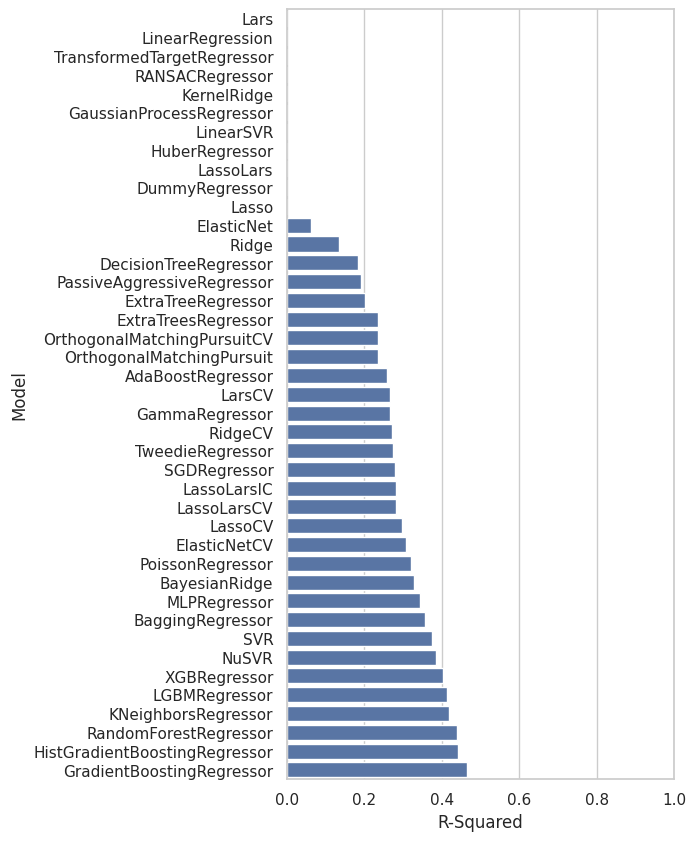

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

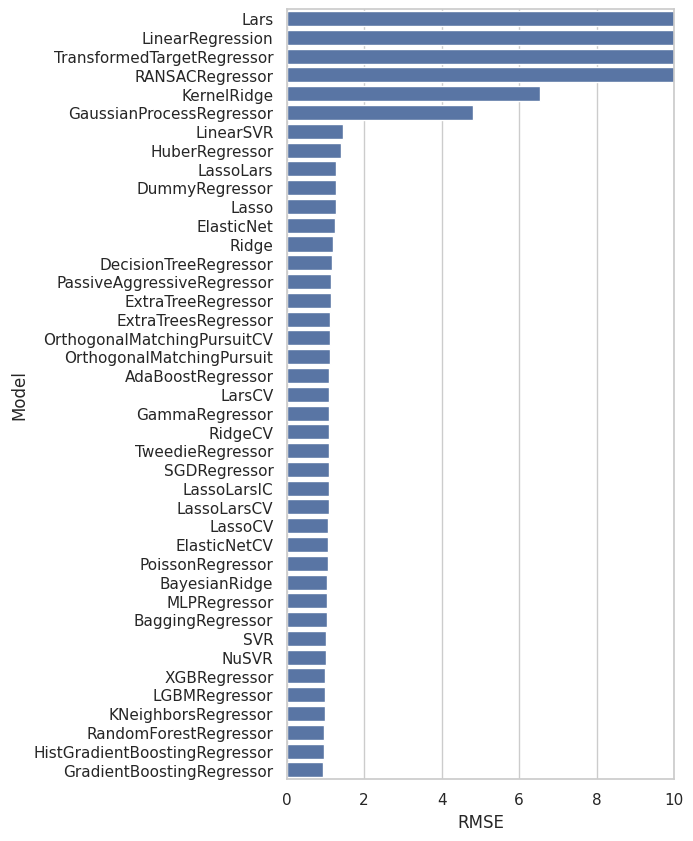

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

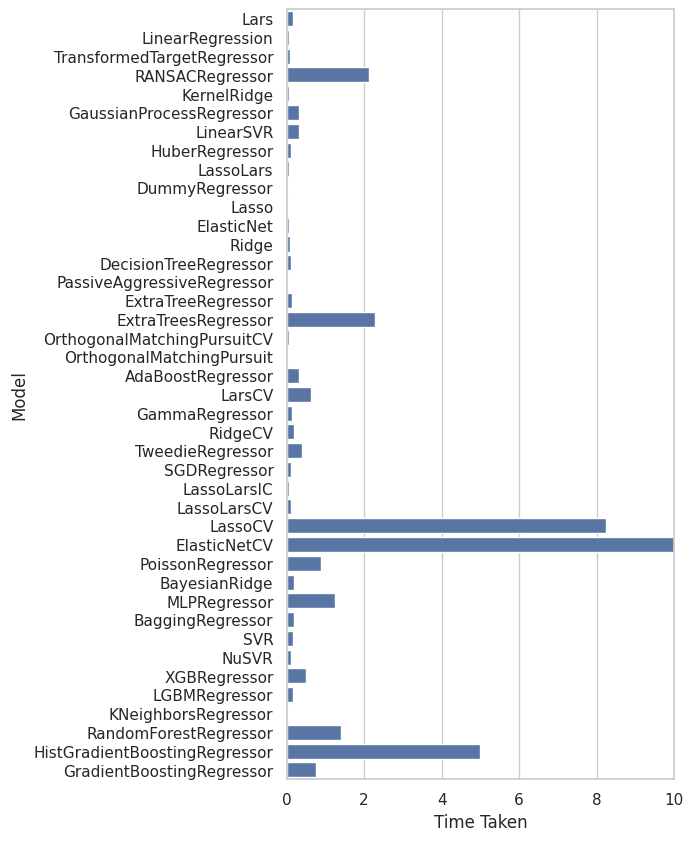

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))